In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, roc_curve

In [4]:
climbers = pd.read_csv("archive(4)/climber_df.csv")
conversions = pd.read_csv("archive(4)/grades_conversion_table.csv")
routes = pd.read_csv("archive(4)/routes_rated.csv")

In [5]:
y = climbers['grades_max'].to_numpy()

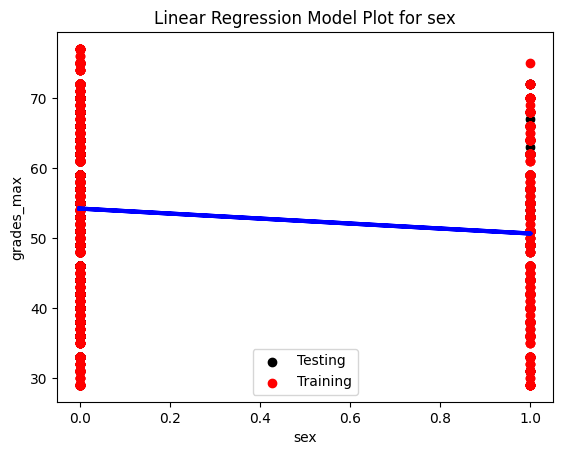

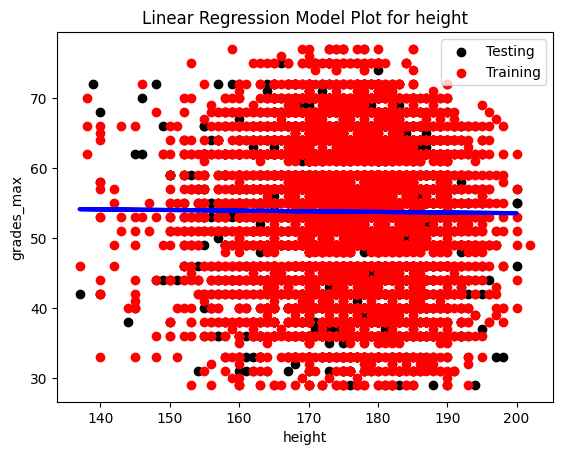

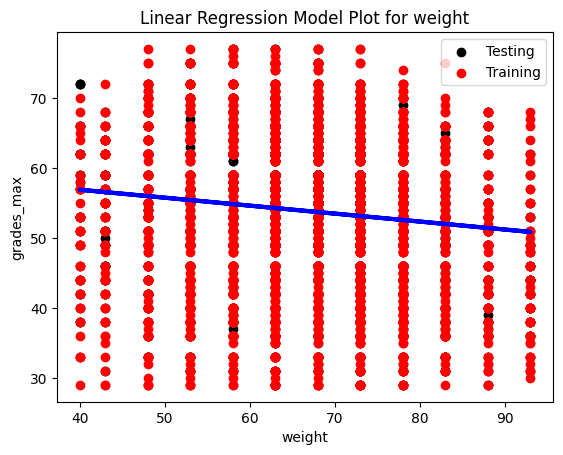

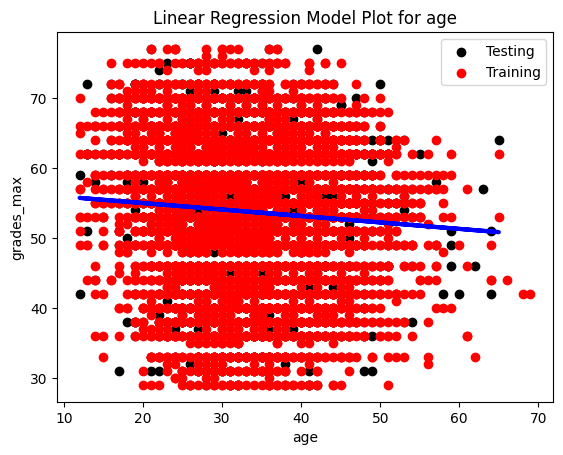

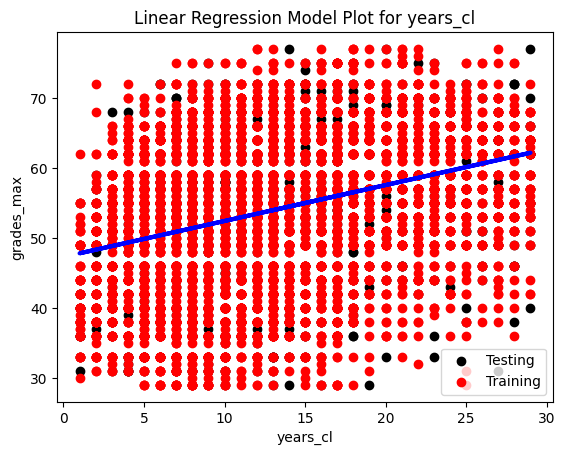

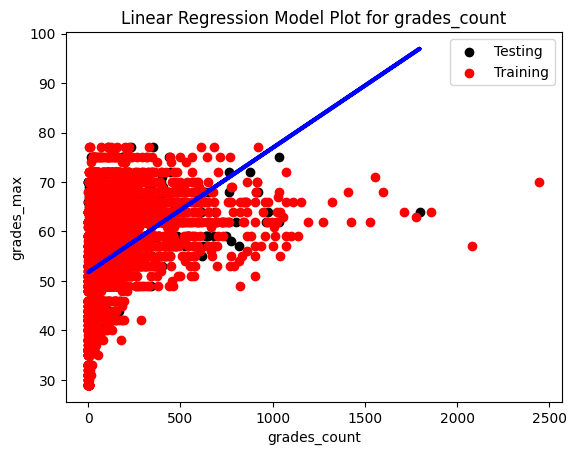

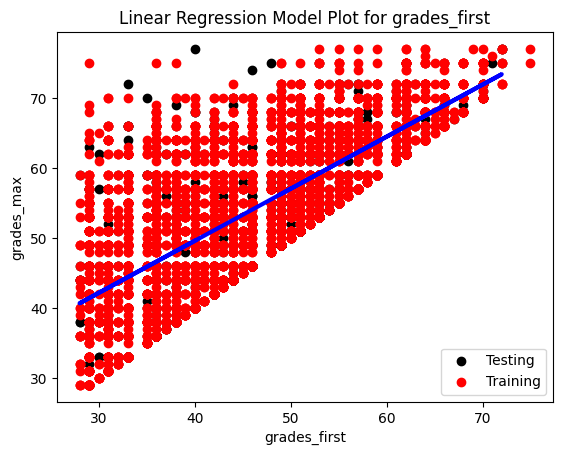

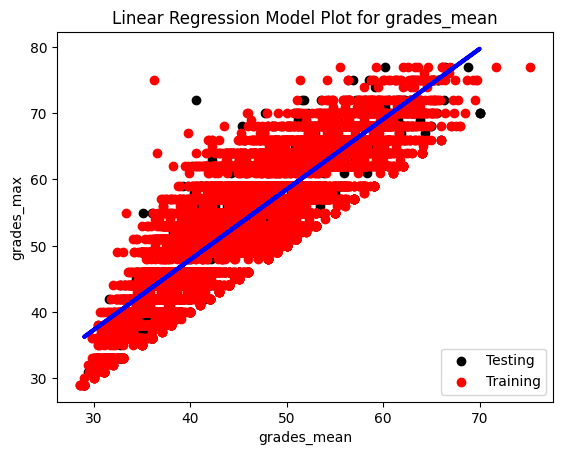

,Feature,Training RMSE,Training R^2,Testing RMSE,Testing R^2,Coefficient,Intercept
0,sex,91.450017,0.014938,96.248401,0.008483,[-3.56583357],54.194851
1,height,92.830904,0.000063,96.951064,0.001244,[-0.00905428],55.345751
2,weight,91.637537,0.012918,94.382571,0.027704,[-0.11380744],61.439015
3,age,92.348720,0.005257,96.432169,0.006589,[-0.09230584],56.828300
4,years_cl,83.023357,0.105706,86.416599,0.109766,[0.5129237],47.271132
5,grades_count,79.816633,0.140248,81.409991,0.161343,[0.02516197],51.746242
6,grades_first,43.487104,0.531575,45.309749,0.533235,[0.74370167],19.817691
7,grades_mean,23.286747,0.749165,23.455121,0.758374,[1.06005636],5.518248


<Figure size 640x480 with 0 Axes>

In [6]:
results = pd.DataFrame(columns=['Feature', 'Training RMSE', 'Training R^2', 'Testing RMSE', 'Testing R^2', 'Coefficient', 'Intercept'])

features = ['sex','height','weight','age','years_cl', 'grades_count', 'grades_first', 'grades_mean']
for feature in features:
    X = climbers[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    plt.scatter(X_train, y_train)
    plt.xlabel(feature)
    plt.ylabel("Mpg")
    plt.title(f"Data plot for {feature}")
    plt.savefig(f"mpg_{feature}.png")
    plt.clf()
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_pred)
    train_r2 = r2_score(y_train, y_pred)
    y_pred = regr.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    row = [feature, train_rmse, train_r2, test_rmse, test_r2, regr.coef_, regr.intercept_ ]
    results.loc[len(results)] = row
    
    plt.scatter(X_test, y_test, color="black")
    plt.scatter(X_train, y_train, color="red")
    plt.plot(X_test, y_pred, color="blue", linewidth=3)
    plt.xlabel(feature)
    plt.ylabel("grades_max")
    plt.legend(["Testing", "Training"])
    plt.title(f"Linear Regression Model Plot for {feature}")
    plt.savefig(f"grades_max_{feature}_model.png")
    plt.show()
    plt.clf()
results.style

In [7]:
all_results = pd.DataFrame(columns=['Training RMSE', 'Training R^2', 'Testing RMSE', 'Testing R^2'])

X = climbers[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
train_rmse = mean_squared_error(y_train, y_pred)
train_r2 = r2_score(y_train, y_pred)
y_pred = regr.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

row = [train_rmse, train_r2, test_rmse, test_r2]
all_results.loc[len(all_results)] = row

all_results.style

,Training RMSE,Training R^2,Testing RMSE,Testing R^2
0,16.791136,0.819133,16.239790,0.832703


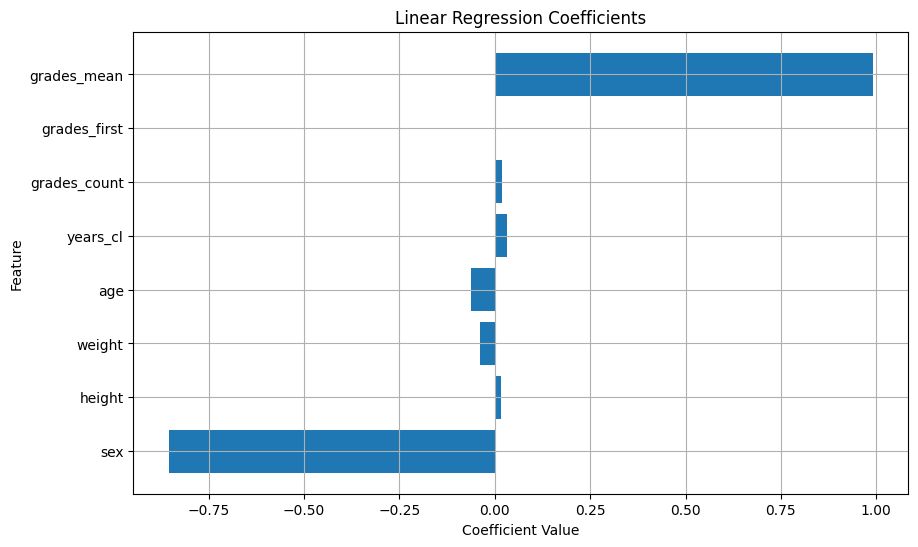

In [8]:
coefficients = regr.coef_
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.grid(True)
plt.show()

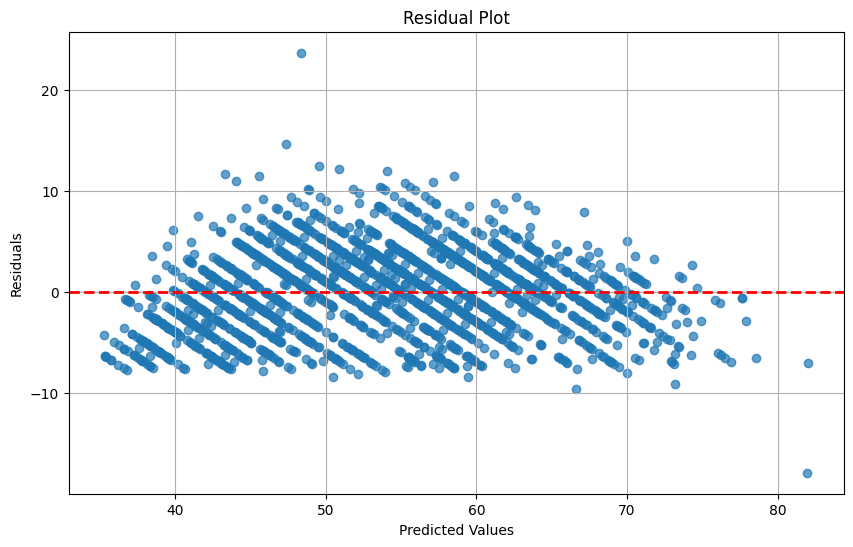

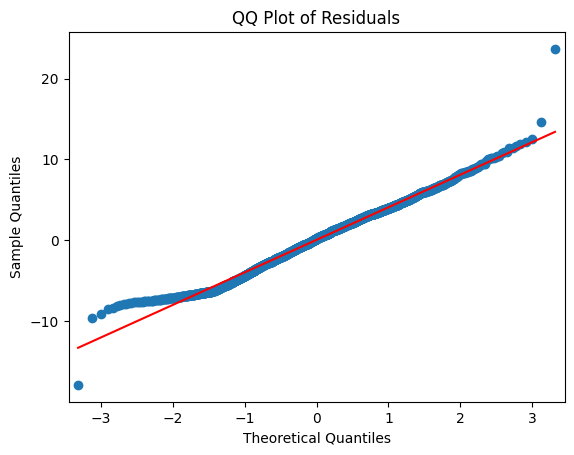

In [13]:
y_pred = regr.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

sm.qqplot(residuals, line='s') 
plt.title('QQ Plot of Residuals')
plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor
features = ['sex','height','weight','age','years_cl', 'grades_count', 'grades_first', 'grades_mean']

X = climbers[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

regressor = RandomForestRegressor(n_estimators=100, random_state=55)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=55)

In [54]:
y_pred = regressor.predict(X_train)
train_rmse = mean_squared_error(y_train, y_pred)
train_r2 = r2_score(y_train, y_pred)
print(f"Train RMSE: {train_rmse}, Train R^2: {train_r2}")
y_pred = regressor.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {test_rmse}, Test R^2: {test_r2}")

Train RMSE: 0.9134181100560576, Train R^2: 0.9901610321603241
Test RMSE: 6.268694190301921, Test R^2: 0.9354220972471712


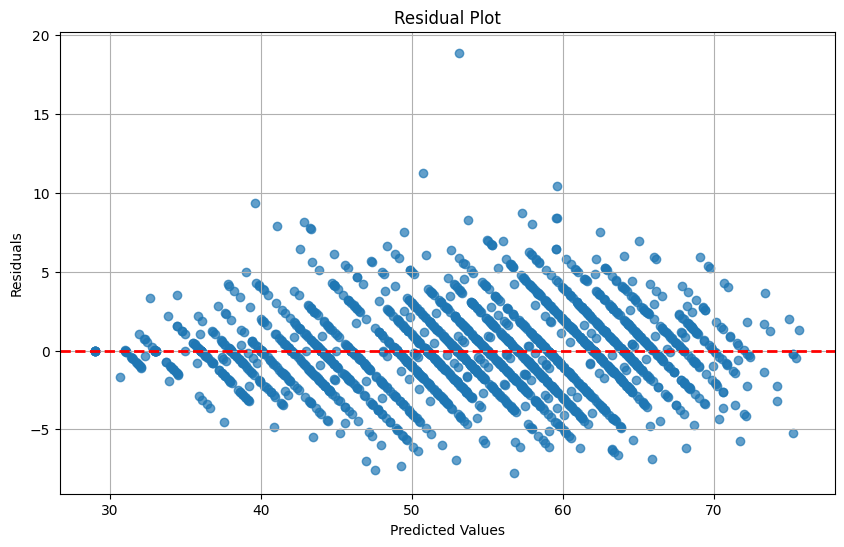

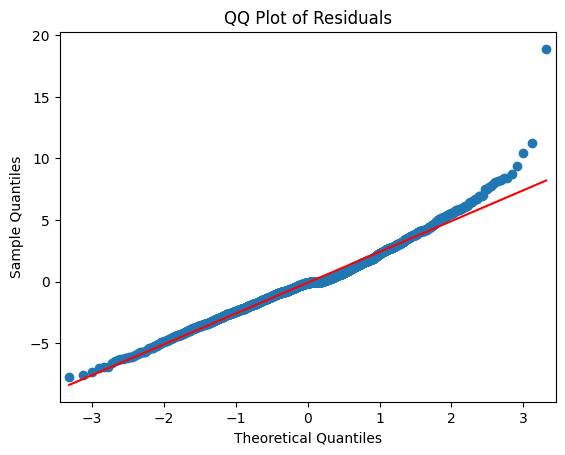

In [43]:
y_pred = regressor.predict(X_test)

import statsmodels.api as sm

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

In [44]:
results = pd.DataFrame(columns=['Feature', 'Training RMSE', 'Training R^2', 'Testing RMSE', 'Testing R^2'])

for feature in features:
    X = climbers[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    
    regr = RandomForestRegressor(n_estimators=100, random_state=55)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_pred)
    train_r2 = r2_score(y_train, y_pred)
    y_pred = regr.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    row = [feature, train_rmse, train_r2, test_rmse, test_r2]
    results.loc[len(results)] = row
results.style

,Feature,Training RMSE,Training R^2,Testing RMSE,Testing R^2
0,sex,91.450314,0.014934,96.242485,0.008543
1,height,91.426260,0.015194,96.015603,0.010881
2,weight,89.247250,0.038665,92.521638,0.046874
3,age,91.348736,0.016029,96.107068,0.009938
4,years_cl,82.045778,0.116236,86.100771,0.113020
5,grades_count,57.824157,0.377142,65.394091,0.326333
6,grades_first,43.317939,0.533397,45.633893,0.529896
7,grades_mean,5.534509,0.940385,16.807029,0.826860


In [45]:
depths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [46]:
X = climbers[[feature]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=55)

In [47]:
results = pd.DataFrame(columns=['Max Depth', 'Validation R^2', 'Validation RMSE'])
for d in depths:
    regr = RandomForestRegressor(n_estimators=100, max_depth=d, random_state=55)
    regr.fit(X_subtrain, y_subtrain)
    y_pred = regr.predict(X_val)
    val_rmse = mean_squared_error(y_val, y_pred)
    val_r2 = r2_score(y_val, y_pred)
    row = [d, val_r2, val_rmse]
    results.loc[len(results)] = row

In [48]:
print(results)

   Max Depth  Validation R^2  Validation RMSE
0       10.0        0.835024        15.694191
1       20.0        0.814746        17.623244
2       30.0        0.807171        18.343856
3       40.0        0.807098        18.350790
4       50.0        0.807098        18.350788
5       60.0        0.807098        18.350788
6       70.0        0.807098        18.350788
7       80.0        0.807098        18.350788
8       90.0        0.807098        18.350788
9      100.0        0.807098        18.350788


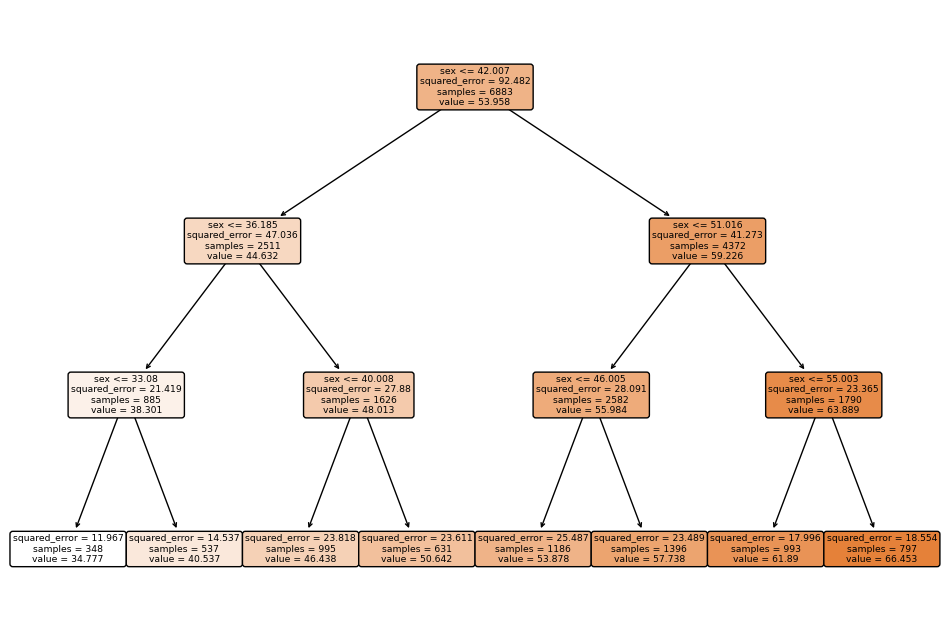

In [50]:
from sklearn.tree import plot_tree
best = RandomForestRegressor(n_estimators=100, random_state=55, max_depth=3)
best.fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(best.estimators_[1], feature_names=['sex','height','weight','age','years_cl', 'grades_count', 'grades_first', 'grades_mean'], filled=True, rounded=True)
plt.show()

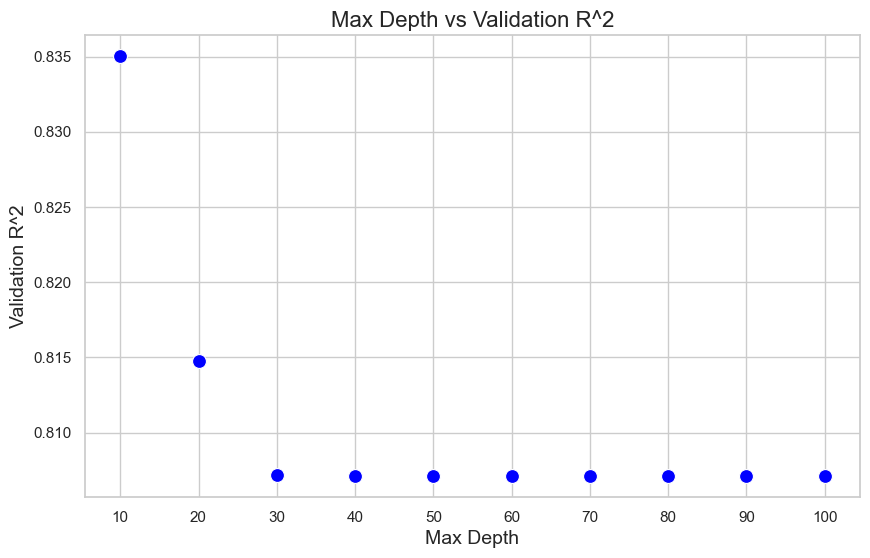

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=results['Max Depth'], y=results['Validation R^2'], color='blue', s=100)

plt.title('Max Depth vs Validation R^2', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Validation R^2', fontsize=14)
plt.xticks(np.arange(min(depths), max(depths)+1, 10))
plt.savefig('max_depth_tune.png')
plt.show()